In [1]:
from tutorials.utils import plotting
from tutorials.utils import plot_new

Inside covid19_components.py: 0 GPUs are available.
No GPUs found! Running the simulation on a CPU.


In [8]:
scenarios = {
    1: "1-no-oracle",
    2: "2-constant",
    3: "",
    4: "4-one_tax_bracket_oracle",
    5: ""
}

envs = ["env000.lz4", "env001.lz4", "env002.lz4", "env003.lz4"]

In [10]:
import lz4.frame
import json
import os

def load_episode_log(filepath):
    with lz4.frame.open(filepath, mode="rb") as log_file:
        log_bytes = log_file.read()
    return json.loads(log_bytes)

def get_latest_log(root):
    log_folders = [item for item in os.listdir(root) if item.startswith('logs_')]
    
    if not log_folders:
        return None  
    
    log_folders.sort()
    return log_folders[-1]


def visualize_logs(scenario, phase, env):
    filepath = f"/home/bahain/forl/runs/{scenarios[scenario]}/{phase}/dense_logs"
    dense_log_path = f"{filepath}/{get_latest_log(filepath)}/{envs[env]}"
    print(f"Visualizing dense log at location: {dense_log_path}")
    
    dense_logs = load_episode_log(dense_log_path)
    # new plotting layout
    (fig0,fig1,fig2), _, _, _, _ = plot_new.breakdown(dense_logs)
    fig2.savefig(f"{scenario}-{phase}-visualize.png")

Visualizing dense log at location: /home/bahain/forl/runs/1-no-oracle/phase2/dense_logs/logs_0000000536250000/env000.lz4
_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :   2.17 (n= 18) |   1.86 (n=  7) |   2.19 (n= 27)
Cost (Stone)   :   1.50 (n=  4) |   2.25 (n= 16) |   2.13 (n= 30)

Income (Wood)  :   2.13 (n= 15) |   2.12 (n= 32) |   2.20 (n=  5)
Income (Stone) :   2.09 (n= 33) |   2.00 (n= 15) |   3.50 (n=  2)
Income (Build) :  14.87 (n=  3) |  11.81 (n=  1) |  20.79 (n= 56)
Visualizing dense log at location: /home/bahain/forl/runs/1-no-oracle/phase2/dense_logs/logs_0000000536250000/env001.lz4
_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :   1.97 (n= 30) |   2.29 (n=  7) |   2.00 (n= 24)
Cost (Stone)   :   2.06 (n= 33) |   1.91 (n= 23) |   1.45 (n= 11)

Income (Wood)  :   3.25 (n=  4) |   1.86 (n= 36) |   2.05 (n= 21)
Income (Stone) :   1.00 (n=  1) |   1.82 (n= 22) |   1.98 (n= 44)
Income (Build) :  20.79 (n= 57

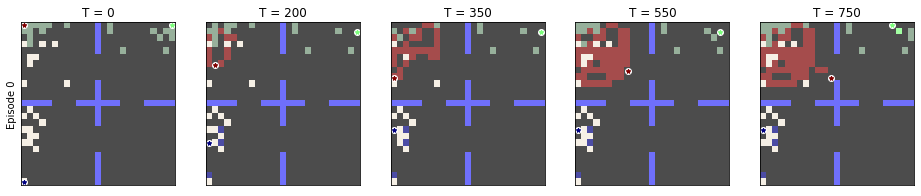

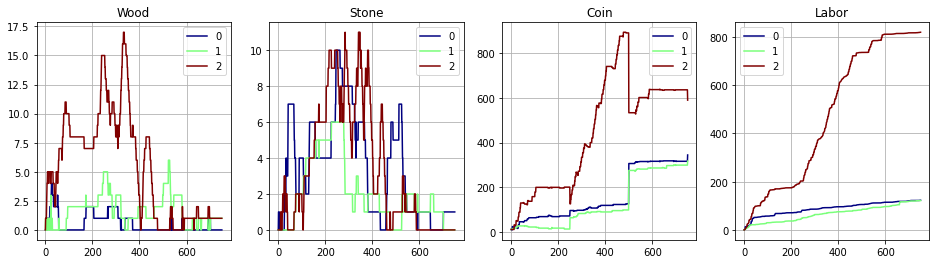

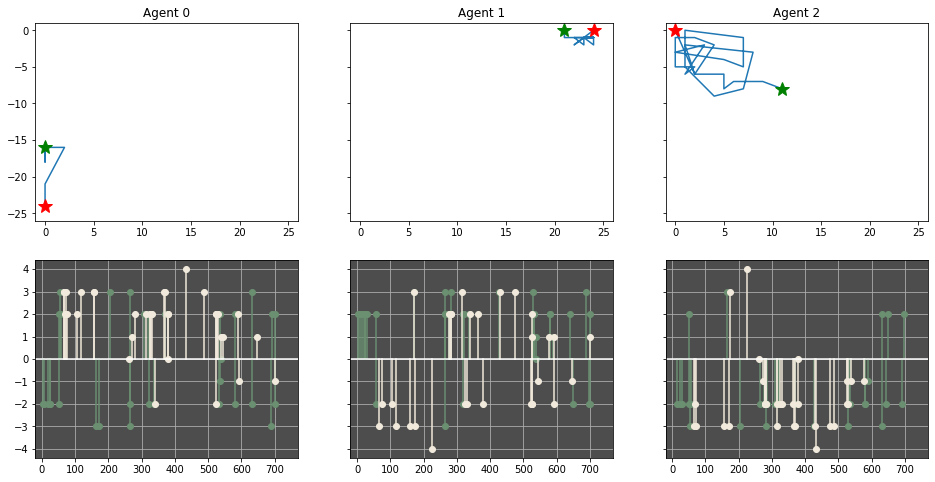

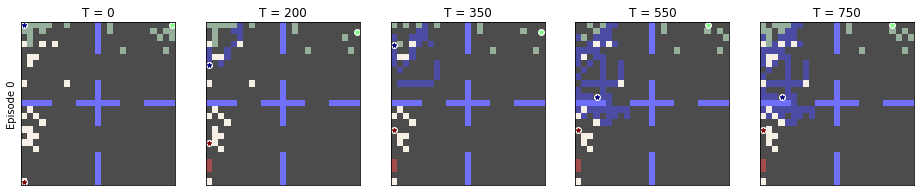

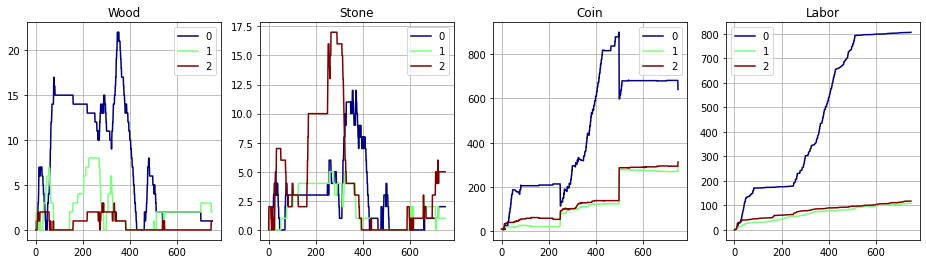

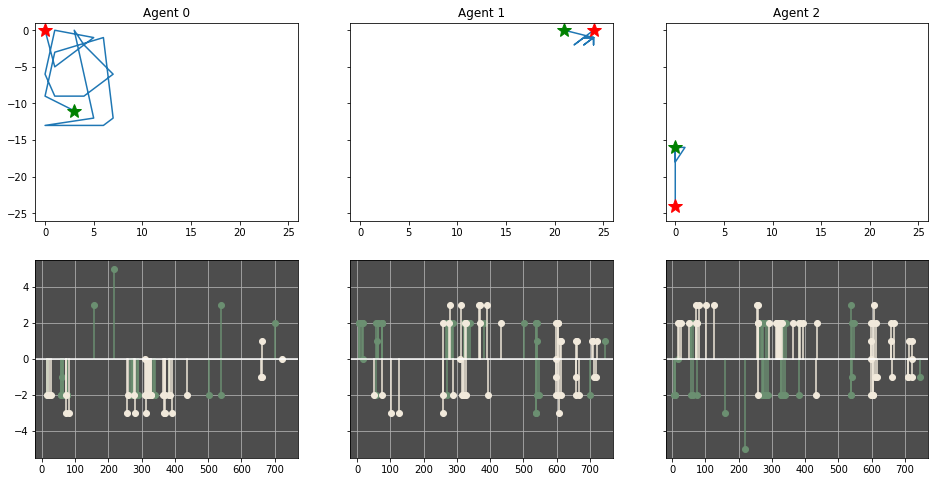

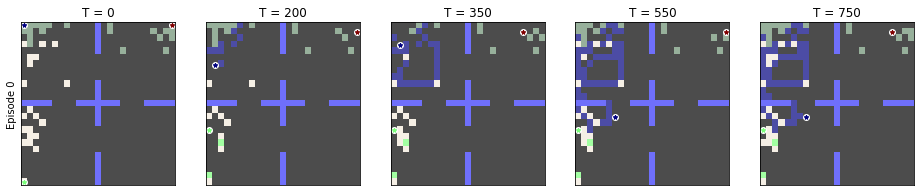

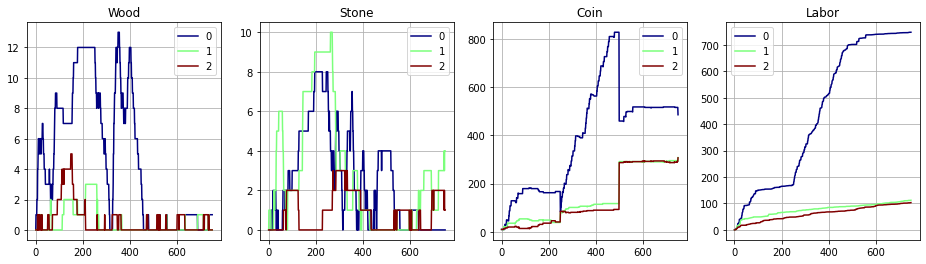

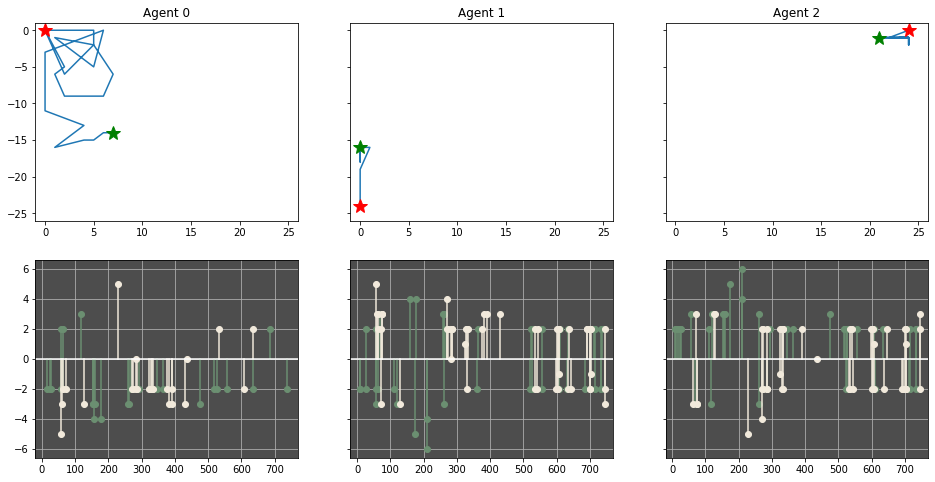

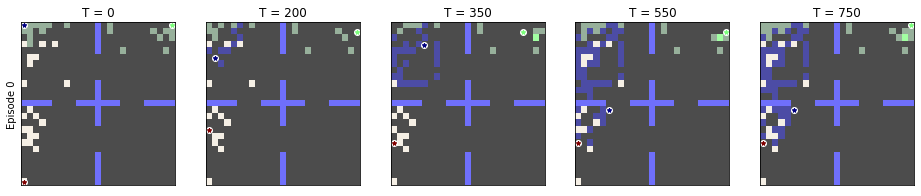

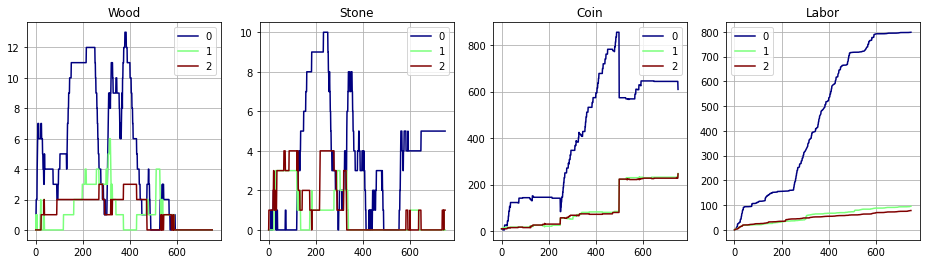

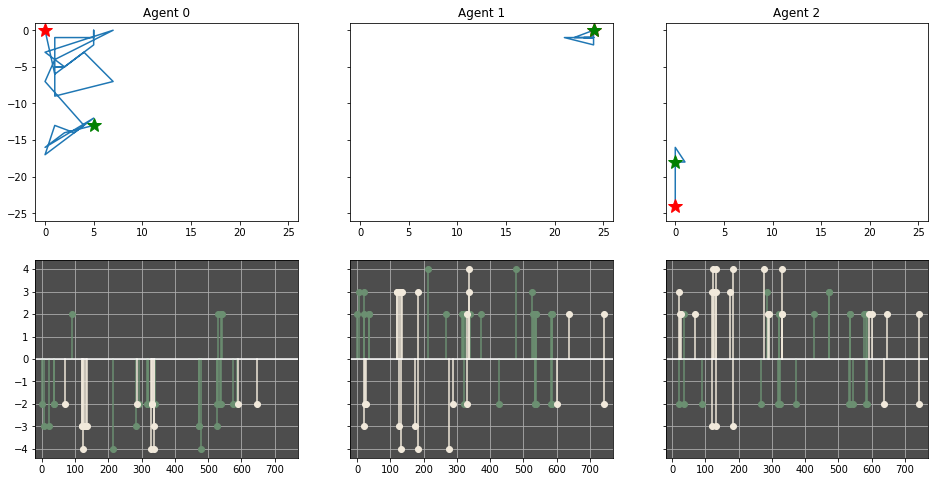

In [13]:
for env in range(len(envs)):
    visualize_logs(scenario=1, phase="phase2", env=env)